<a href="https://colab.research.google.com/github/Sunkeerth/Data_Cleaning_Services/blob/main/ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning is all about systems that learn patterns from data on their own. Instead of us explicitly programming every rule, we give the model data, and it figures out the underlying logic or patterns by itself—like teaching it to learn from experience!

Classification :

 **Classification** is like sorting things into categories.
 1. **Binary classification** is when you have just two categories—like yes or no, spam or not spam. It’s a simple either-or situation.
 2. **Multi-class classification** is when you have three or more categories. For example, classifying an animal photo as cat, dog, or bird. So, binary is just two options, and multi-class is several options

Regression :
**Regression** is all about predicting a continuous value that can move in any direction—up or down—depending on the data. It’s just about finding the best relationship between what you know and what number you want to predict


Task ⁉

1. Linear Regression ⁉

linear regression is about finding a straight line that best fits your data. Imagine you have a bunch of points on a graph—each point shows how one thing (like studying time) relates to another thing (like exam score).


Epoch    0 | Loss = 44.000000 | m = 0.4400 | b = 0.1200

Final Model:
m (slope)     = 1.7374
b (intercept) = 0.4628


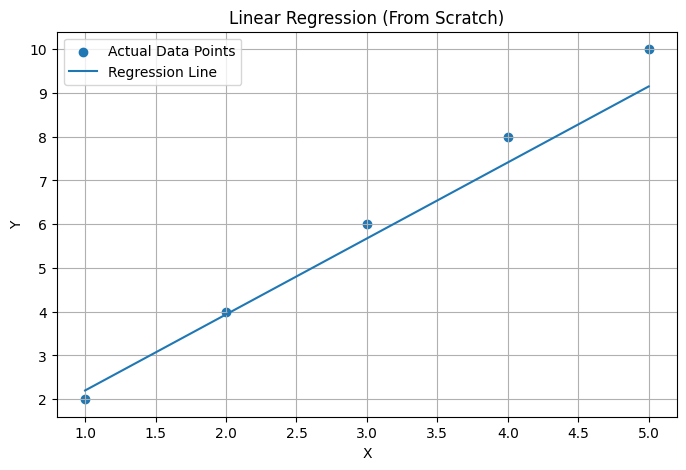

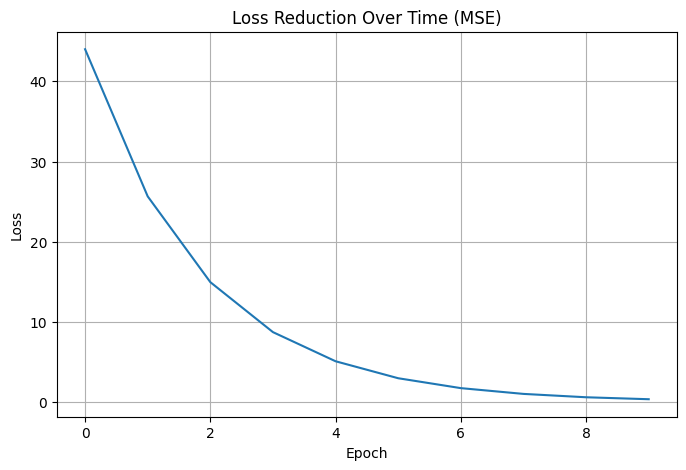

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LINEAR REGRESSION (FROM SCRATCH) - HANDS ON
# ==========================================================
# We want to fit a straight line:
#     y = m*x + b
#
# Where:
#   m = slope
#   b = intercept
#
# Prediction formula:
#   y_hat = m*x + b
#
# Loss function (Mean Squared Error):
#   MSE = (1/n) * Σ (y - y_hat)^2
#
# Goal:
#   Find best m and b that minimize MSE
#
# We will use Gradient Descent:
#   m = m - lr * dMSE/dm
#   b = b - lr * dMSE/db
# ==========================================================


# ==========================================================
# 1) SIMPLE DATA
# ==========================================================
# We'll take 2 points to form a basic line idea:
#   (x1, y1), (x2, y2)
# Example: (1,2), (2,4)
# That line is roughly y = 2x

# But we will add more points to calculate loss and train properly.
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)  # Perfect line: y = 2x

# You can also try noisy data like this:
# y = np.array([2.1, 3.9, 6.2, 7.8, 10.1], dtype=float)


# ==========================================================
# 2) INITIALIZE m AND b (start from random or 0)
# ==========================================================
m = 0.0
b = 0.0

# Learning rate (how fast we update)
lr = 0.01

# Number of iterations (training steps)
epochs = 10


# ==========================================================
# 3) FUNCTIONS: PREDICT + LOSS
# ==========================================================
def predict(x, m, b):
    """
    Prediction formula:
        y_hat = m*x + b
    """
    return m * x + b


def mse_loss(y, y_hat):
    """
    Mean Squared Error (MSE):
        MSE = (1/n) * Σ (y - y_hat)^2
    """
    return np.mean((y - y_hat) ** 2)


# ==========================================================
# 4) TRAIN USING GRADIENT DESCENT
# ==========================================================
# Derivatives of MSE:
#
# y_hat = m*x + b
#
# MSE = (1/n) Σ (y - y_hat)^2
#
# d(MSE)/dm = (-2/n) Σ x * (y - y_hat)
# d(MSE)/db = (-2/n) Σ (y - y_hat)
#
# Update rules:
# m = m - lr * d(MSE)/dm
# b = b - lr * d(MSE)/db
# ==========================================================

loss_history = []

for epoch in range(epochs):
    # Step 1: Predict
    y_hat = predict(x, m, b)

    # Step 2: Calculate Loss
    loss = mse_loss(y, y_hat)
    loss_history.append(loss)

    # Step 3: Compute gradients
    n = len(x)

    dm = (-2 / n) * np.sum(x * (y - y_hat))   # dMSE/dm
    db = (-2 / n) * np.sum(y - y_hat)         # dMSE/db

    # Step 4: Update parameters
    m = m - lr * dm
    b = b - lr * db

    # Print some steps (optional)
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss:.6f} | m = {m:.4f} | b = {b:.4f}")


print("\nFinal Model:")
print(f"m (slope)     = {m:.4f}")
print(f"b (intercept) = {b:.4f}")


# ==========================================================
# 5) VISUALIZATION
# ==========================================================

# Plot data points
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Data Points")

# Plot final regression line
y_final = predict(x, m, b)
plt.plot(x, y_final, label="Regression Line")

plt.title("Linear Regression (From Scratch)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# ==========================================================
# 6) LOSS CURVE VISUALIZATION
# ==========================================================
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title("Loss Reduction Over Time (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
